In [1]:
import pandas as pd
import numpy as np
import random

num_rows = 10000

data = {
    "Order ID": range(1, num_rows + 1),
    "Product": np.random.choice(
        ["liz", "no3man", "Anis", "Har Nar", "K3bol", "Rengo", "Tarzan"], 
        num_rows
    ),
    "Category": ["snacks"] * num_rows,
    "Quantity Ordered": np.random.randint(1, 10, num_rows),  
    "Price Each": np.random.uniform(20.0, 100.0, num_rows).round(2),  
    "Order Date": pd.to_datetime(
        np.random.choice(
            pd.date_range(start="2024-01-01", end="2024-12-31"), 
            num_rows
        )
    ),
    "City": np.random.choice(
        ["Sanaa", "TAiz", "Aden", "Hodaia", "Dhamar"], 
        num_rows
    ),
    "Customer ID": np.random.randint(100, 1000, num_rows),  
    "Age": np.random.randint(5, 25, num_rows),  
}


df = pd.DataFrame(data)


df.to_csv("sales.csv", index=False)


df.tail()

,Order ID,Product,Category,Quantity Ordered,Price Each,Order Date,City,Customer ID,Age
0,1,Anis,snacks,7,96.83,2024-02-21,Sanaa,835,13
1,2,K3bol,snacks,9,91.88,2024-12-26,TAiz,685,19
2,3,Tarzan,snacks,5,82.17,2024-03-21,TAiz,683,17
3,4,Tarzan,snacks,9,91.28,2024-02-28,Sanaa,341,17
4,5,Tarzan,snacks,2,53.37,2024-05-21,Hodaia,542,6


In [5]:
df.describe().round(2)

,Order ID,Quantity Ordered,Price Each,Order Date,Customer ID,Age
count,10000.00,10000.00,10000.00,10000,10000.00,10000.00
mean,5000.50,5.00,60.59,2024-07-02 11:19:23.520000,549.90,14.51
min,1.00,1.00,20.00,2024-01-01 00:00:00,100.00,5.00
25%,2500.75,3.00,40.69,2024-04-01 00:00:00,321.75,9.00
50%,5000.50,5.00,60.96,2024-07-02 12:00:00,549.00,15.00
75%,7500.25,7.00,80.46,2024-10-01 00:00:00,776.00,20.00
max,10000.00,9.00,99.99,2024-12-31 00:00:00,999.00,24.00
std,2886.90,2.55,23.09,NaN,261.08,5.78


<h1>المكاتب </h1>


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data


In [7]:
df = df.dropna()

In [8]:


# تحويل العمود Order Date إلى نوع datetime
# يقوم هذا السطر بتحويل البيانات النصية في عمود 
# إلى نوع تاريخ ووقت (datetime)، مما يسمح باستخدام وظائف التعامل مع التاريخ بسهولة.

df['Order Date'] = pd.to_datetime(df['Order Date'])

# إضافة عمود جديد: إجمالي الإيرادات (الكمية * السعر)
df['Total Revenue'] = df['Quantity Ordered'] * df['Price Each']

# استخراج الشهر من تاريخ الطلب
df['Month'] = df['Order Date'].dt.month

# تحليل البيانات
# المنتجات الأكثر مبيعًا
top_products = df.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False)

# الإيرادات الشهرية
monthly_revenue = df.groupby('Month')['Total Revenue'].sum()

# المدن الأكثر تحقيقًا للإيرادات
city_revenue = df.groupby('City')['Total Revenue'].sum()

# الفئات العمرية الأكثر شراءً
age_groups = pd.cut(df['Age'], bins=[5, 9, 15, 20, 25], labels=['5-8', '9-14', '15-20', '20-25'])
age_group_revenue = df.groupby(age_groups)['Total Revenue'].sum()

C:\Users\AMBORIHI\AppData\Local\Temp\ipykernel_12364\2759736417.py:27: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_revenue = df.groupby(age_groups)['Total Revenue'].sum()


In [11]:
df.head()

,Order ID,Product,Category,Quantity Ordered,Price Each,Order Date,City,Customer ID,Age,Total Revenue,Month
0,1,Anis,snacks,7,96.83,2024-02-21,Sanaa,835,13,677.81,2
1,2,K3bol,snacks,9,91.88,2024-12-26,TAiz,685,19,826.92,12
2,3,Tarzan,snacks,5,82.17,2024-03-21,TAiz,683,17,410.85,3
3,4,Tarzan,snacks,9,91.28,2024-02-28,Sanaa,341,17,821.52,2
4,5,Tarzan,snacks,2,53.37,2024-05-21,Hodaia,542,6,106.74,5


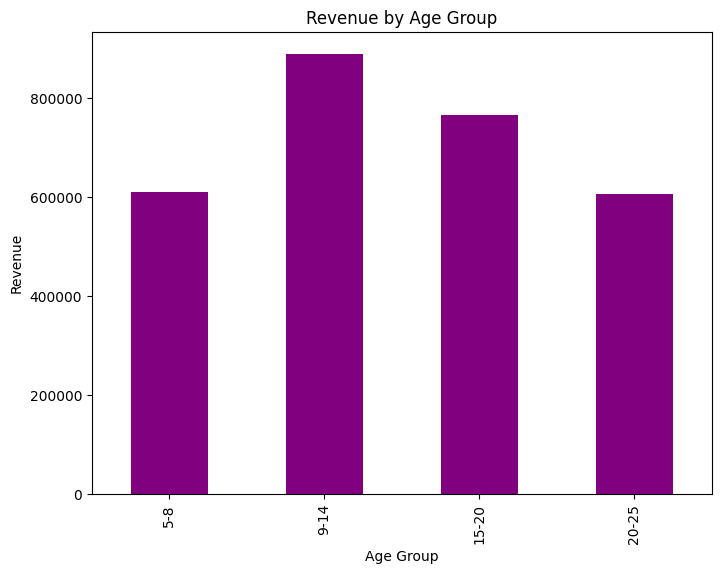

In [12]:
plt.figure(figsize=(8, 6))
age_group_revenue.plot(kind='bar', color='purple')
plt.title('Revenue by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Revenue')
plt.show()

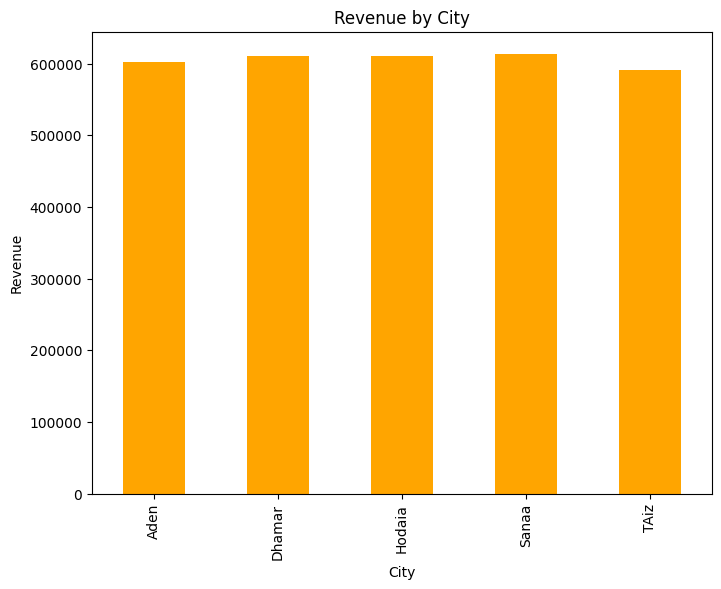

In [13]:
plt.figure(figsize=(8, 6))
city_revenue.plot(kind='bar', color='orange')
plt.title('Revenue by City')
plt.xlabel('City')
plt.ylabel('Revenue')
plt.show()

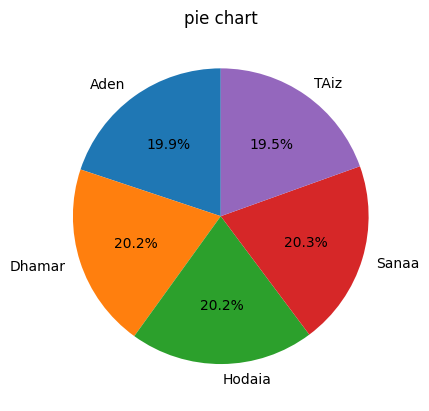

In [14]:

city_revenue
labels=["Aden", "Dhamar", "Hodaia", "Sanaa", "TAiz"]
sizes=city_revenue
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90)
plt.title('pie chart')
plt.show()

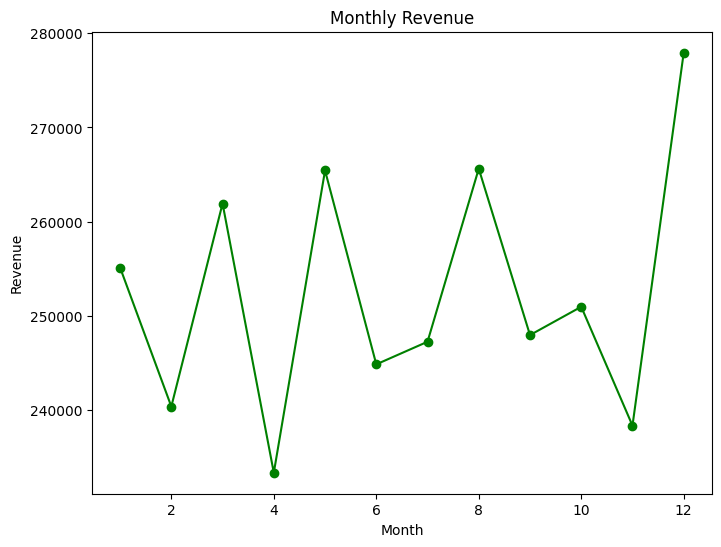

In [15]:
plt.figure(figsize=(8, 6))
monthly_revenue.plot(kind='line', marker='o', color='green')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()